In [37]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = datasets.load_iris(return_X_y=True, as_frame=True)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)

AdaBoostClassifier accuracy: 0.8888888888888888
AdaBoostClassifier feature importances:
 petal width (cm)     0.51
petal length (cm)    0.49
sepal length (cm)    0.00
sepal width (cm)     0.00
dtype: float64

AdaBoostClassifier DecisionTreeClassifier 0


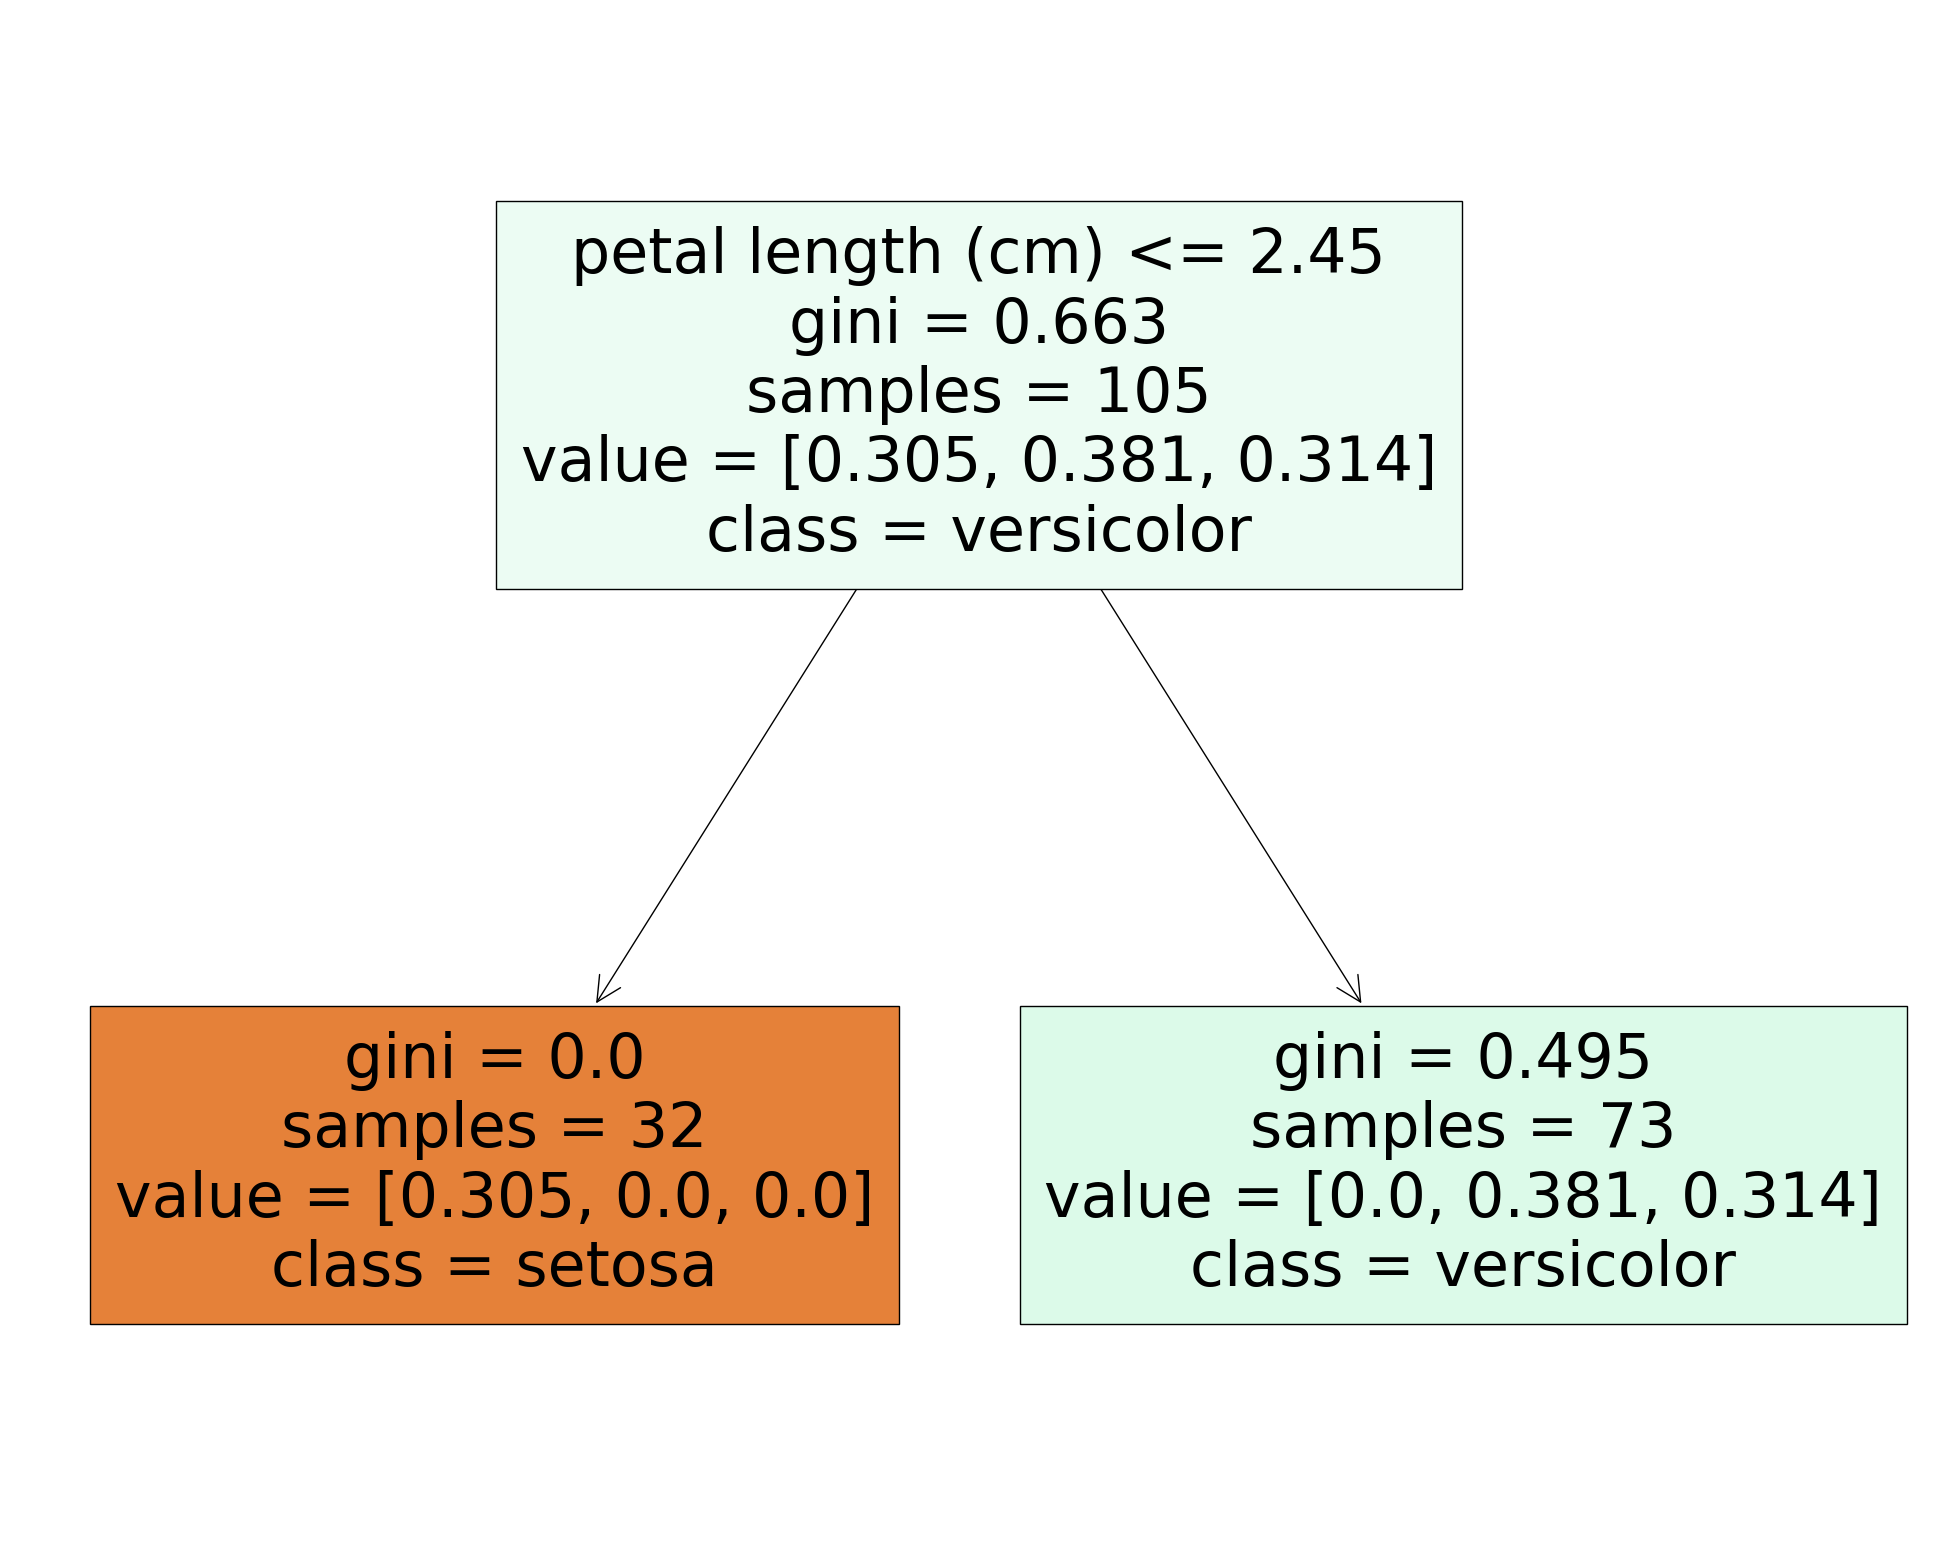

AdaBoostClassifier DecisionTreeClassifier 1


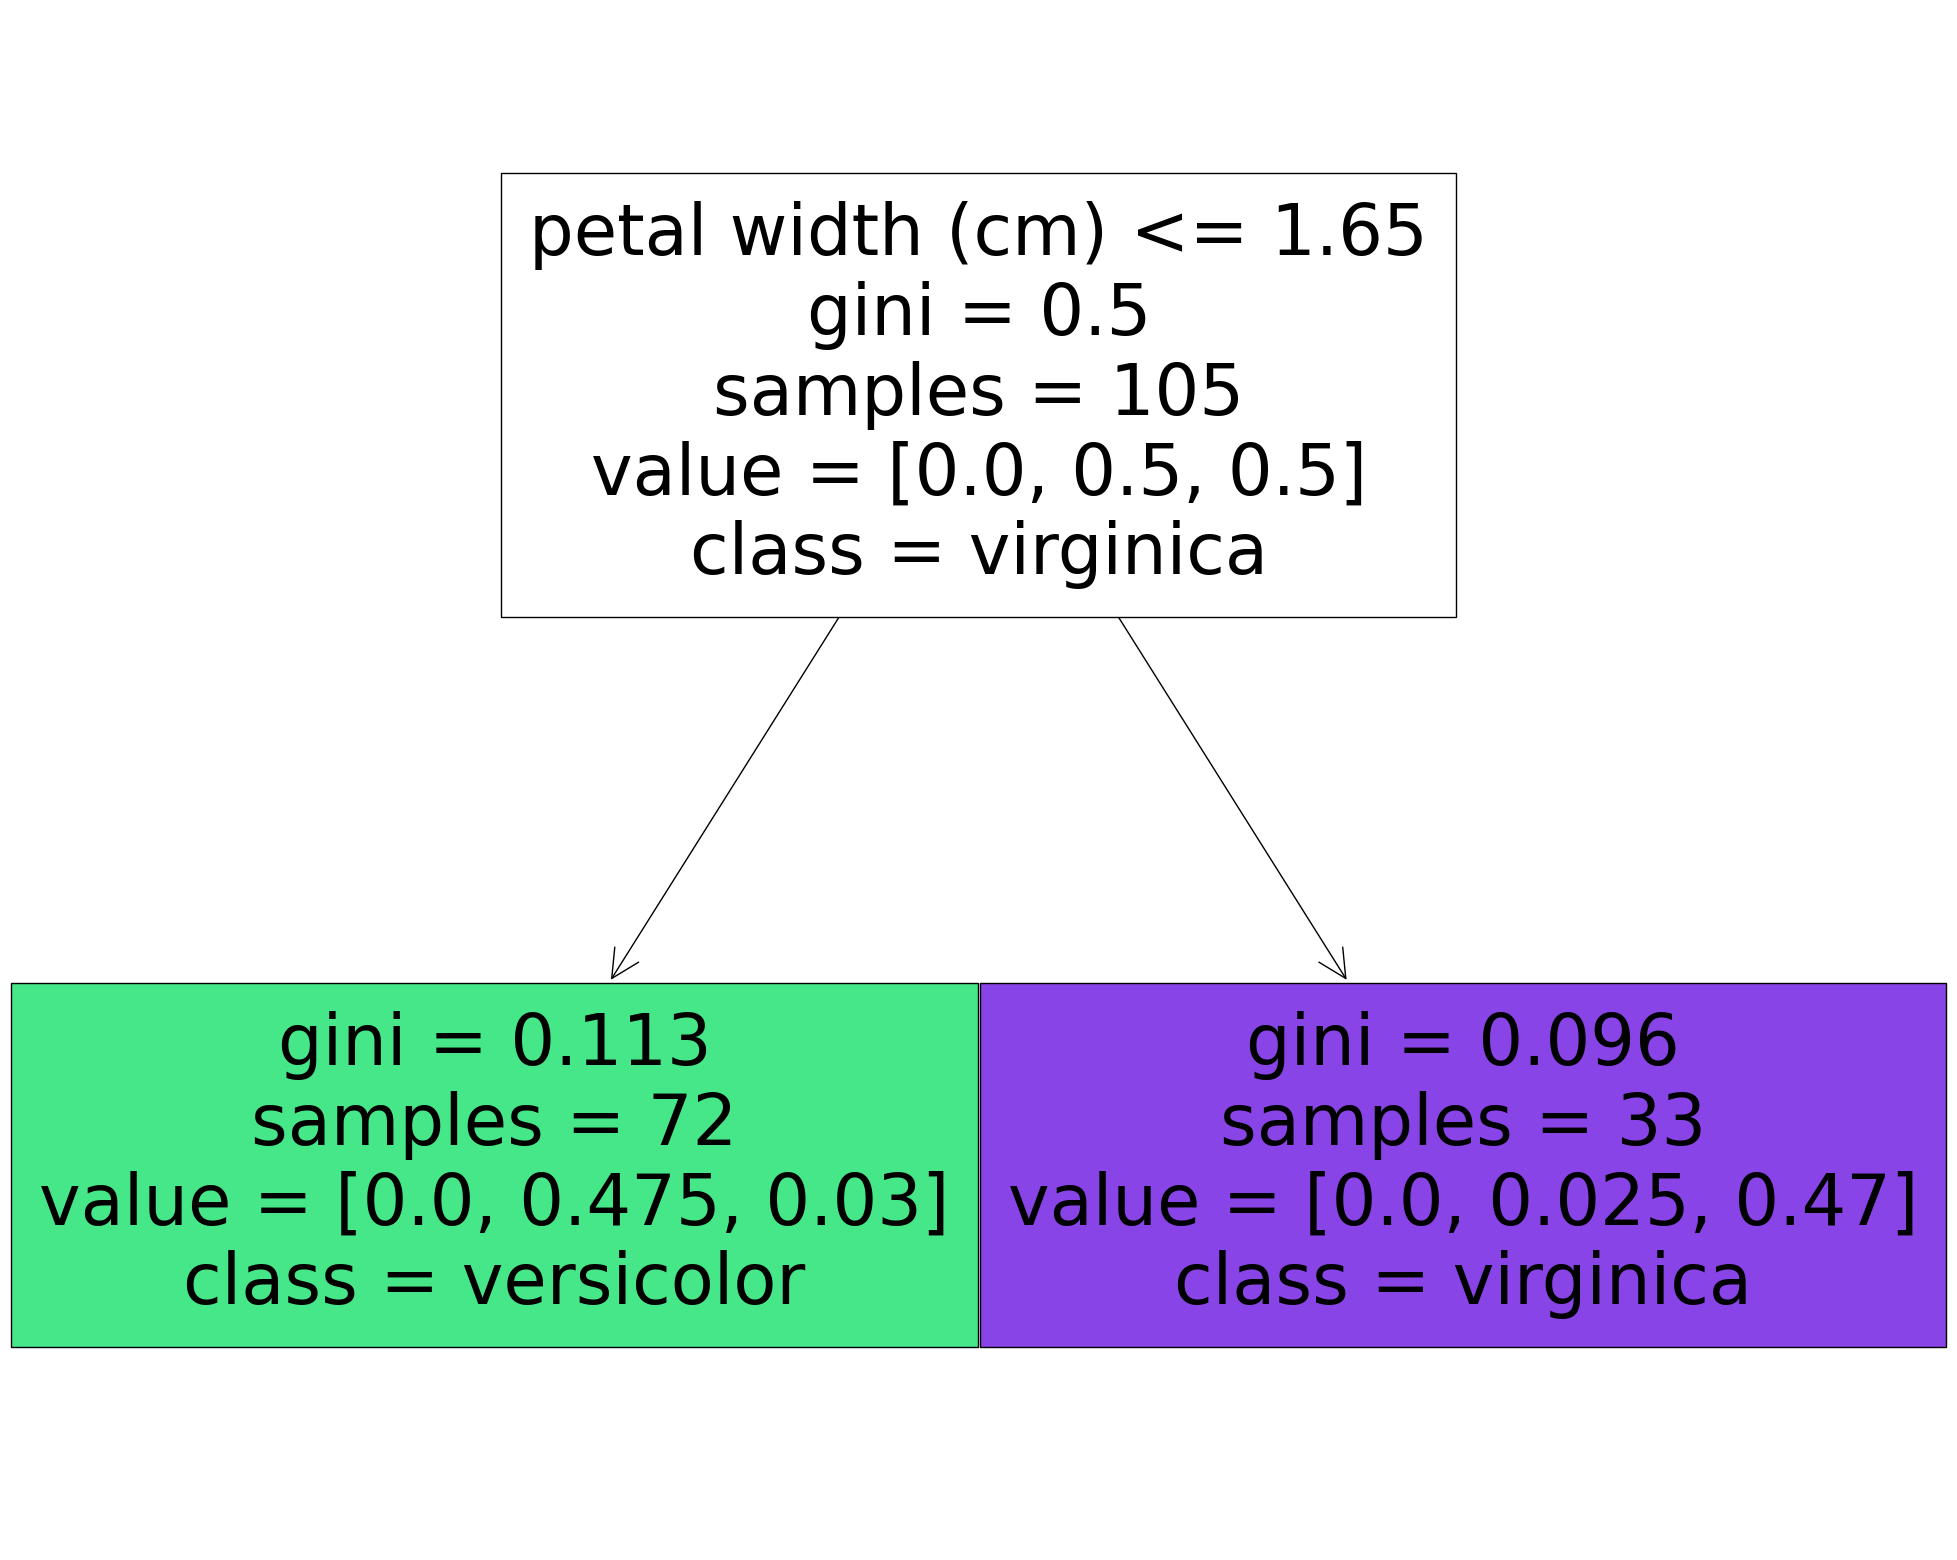

AdaBoostClassifier DecisionTreeClassifier 2


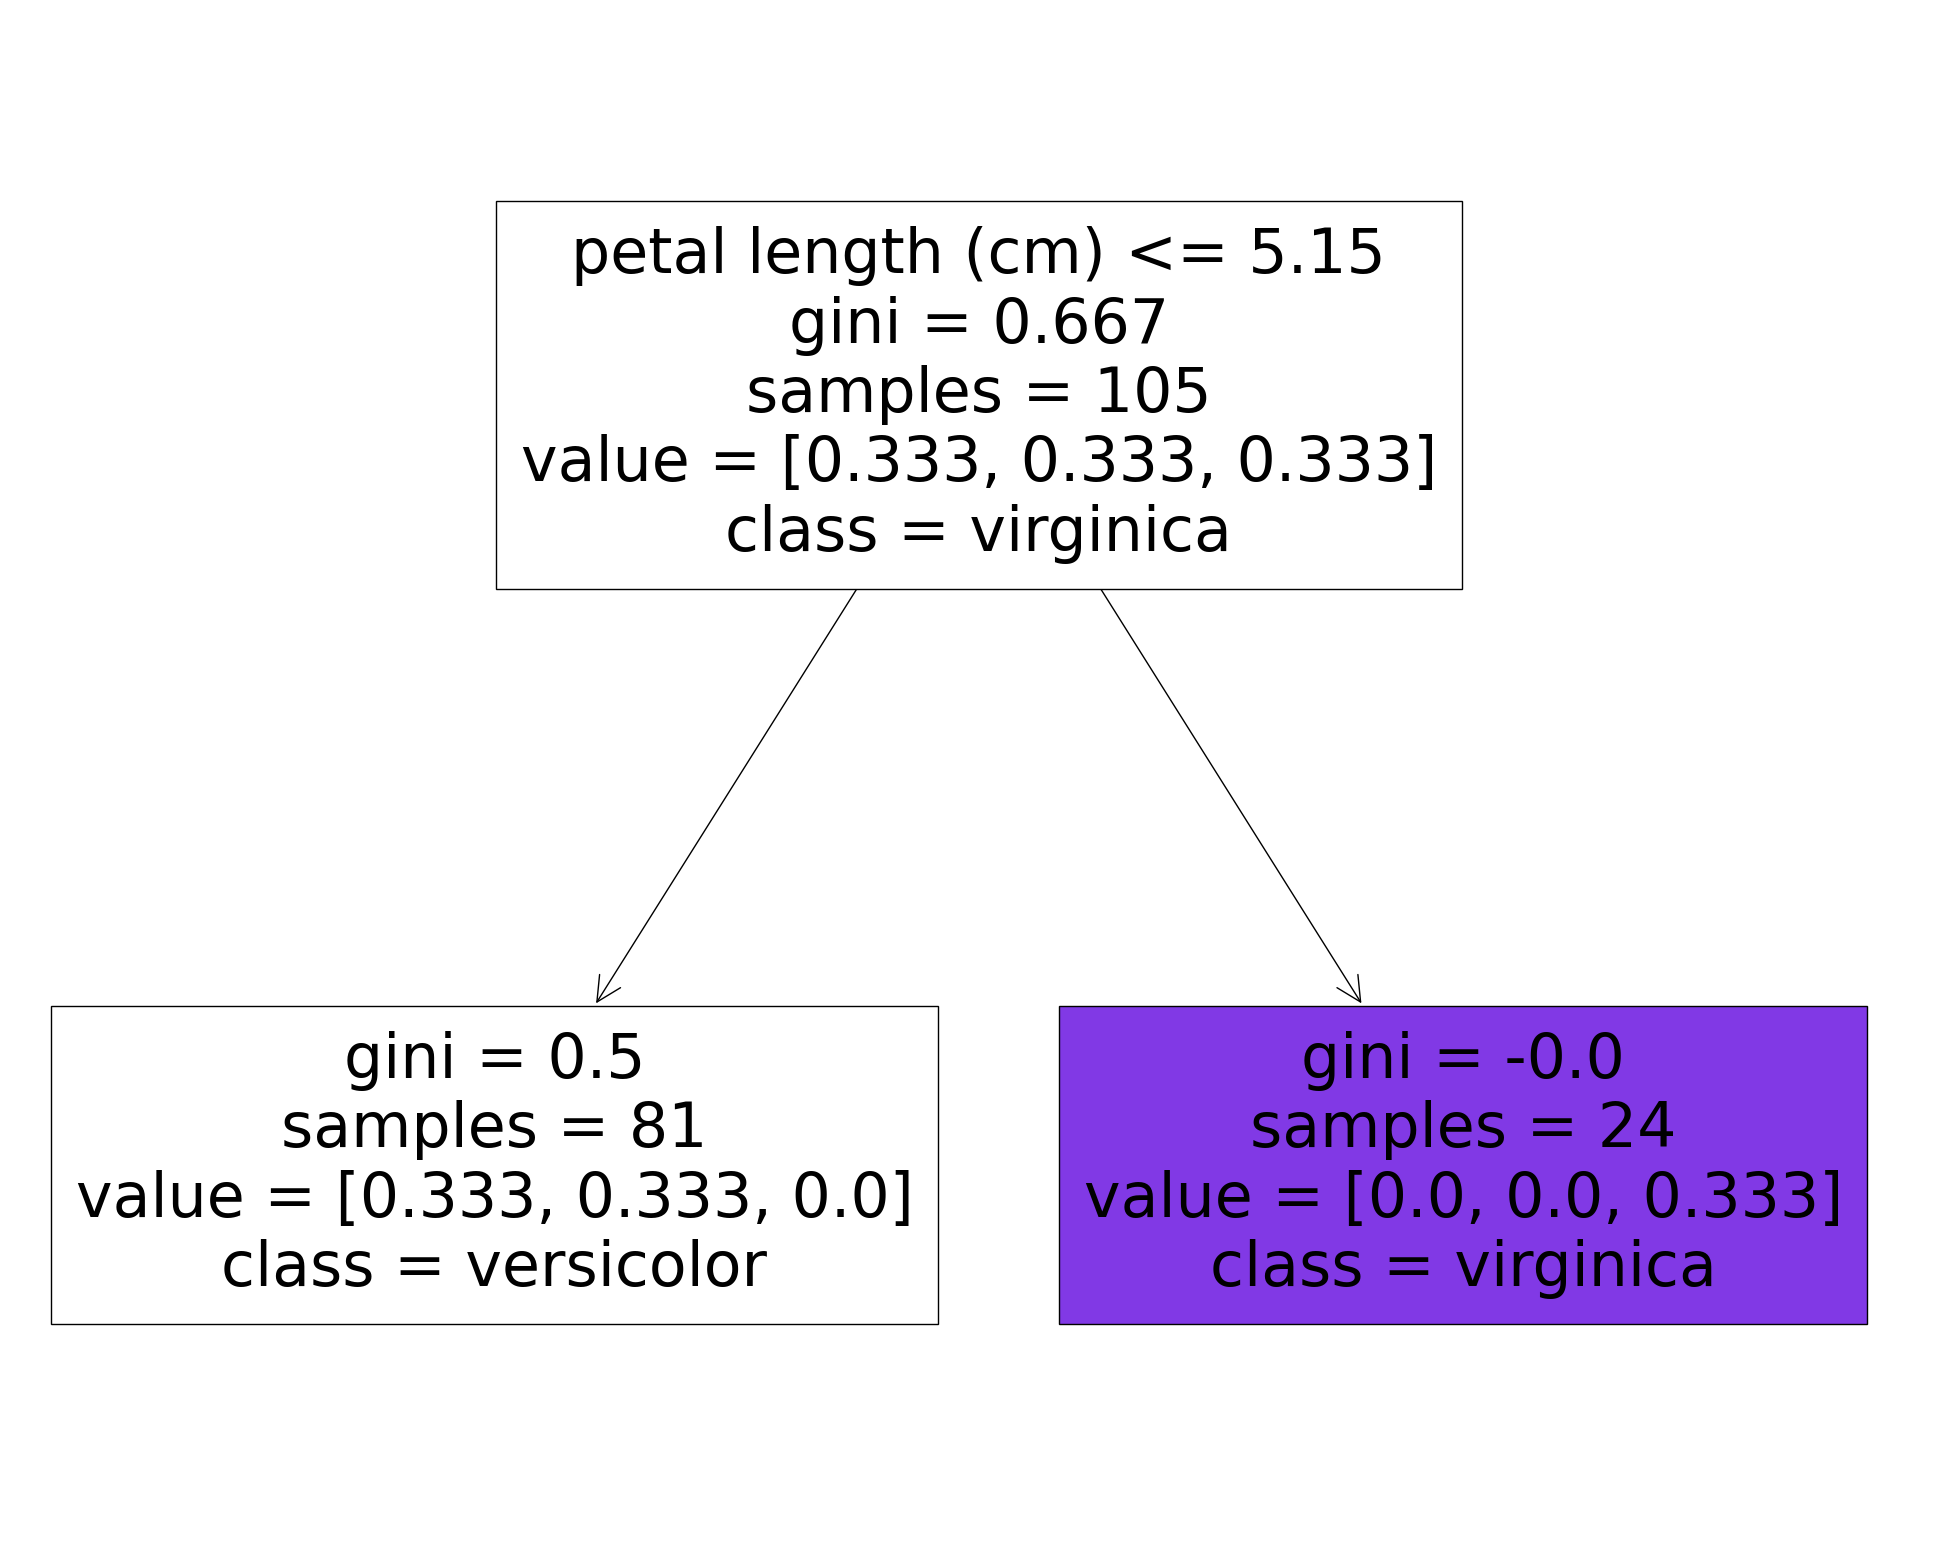

AdaBoostClassifier DecisionTreeClassifier 3


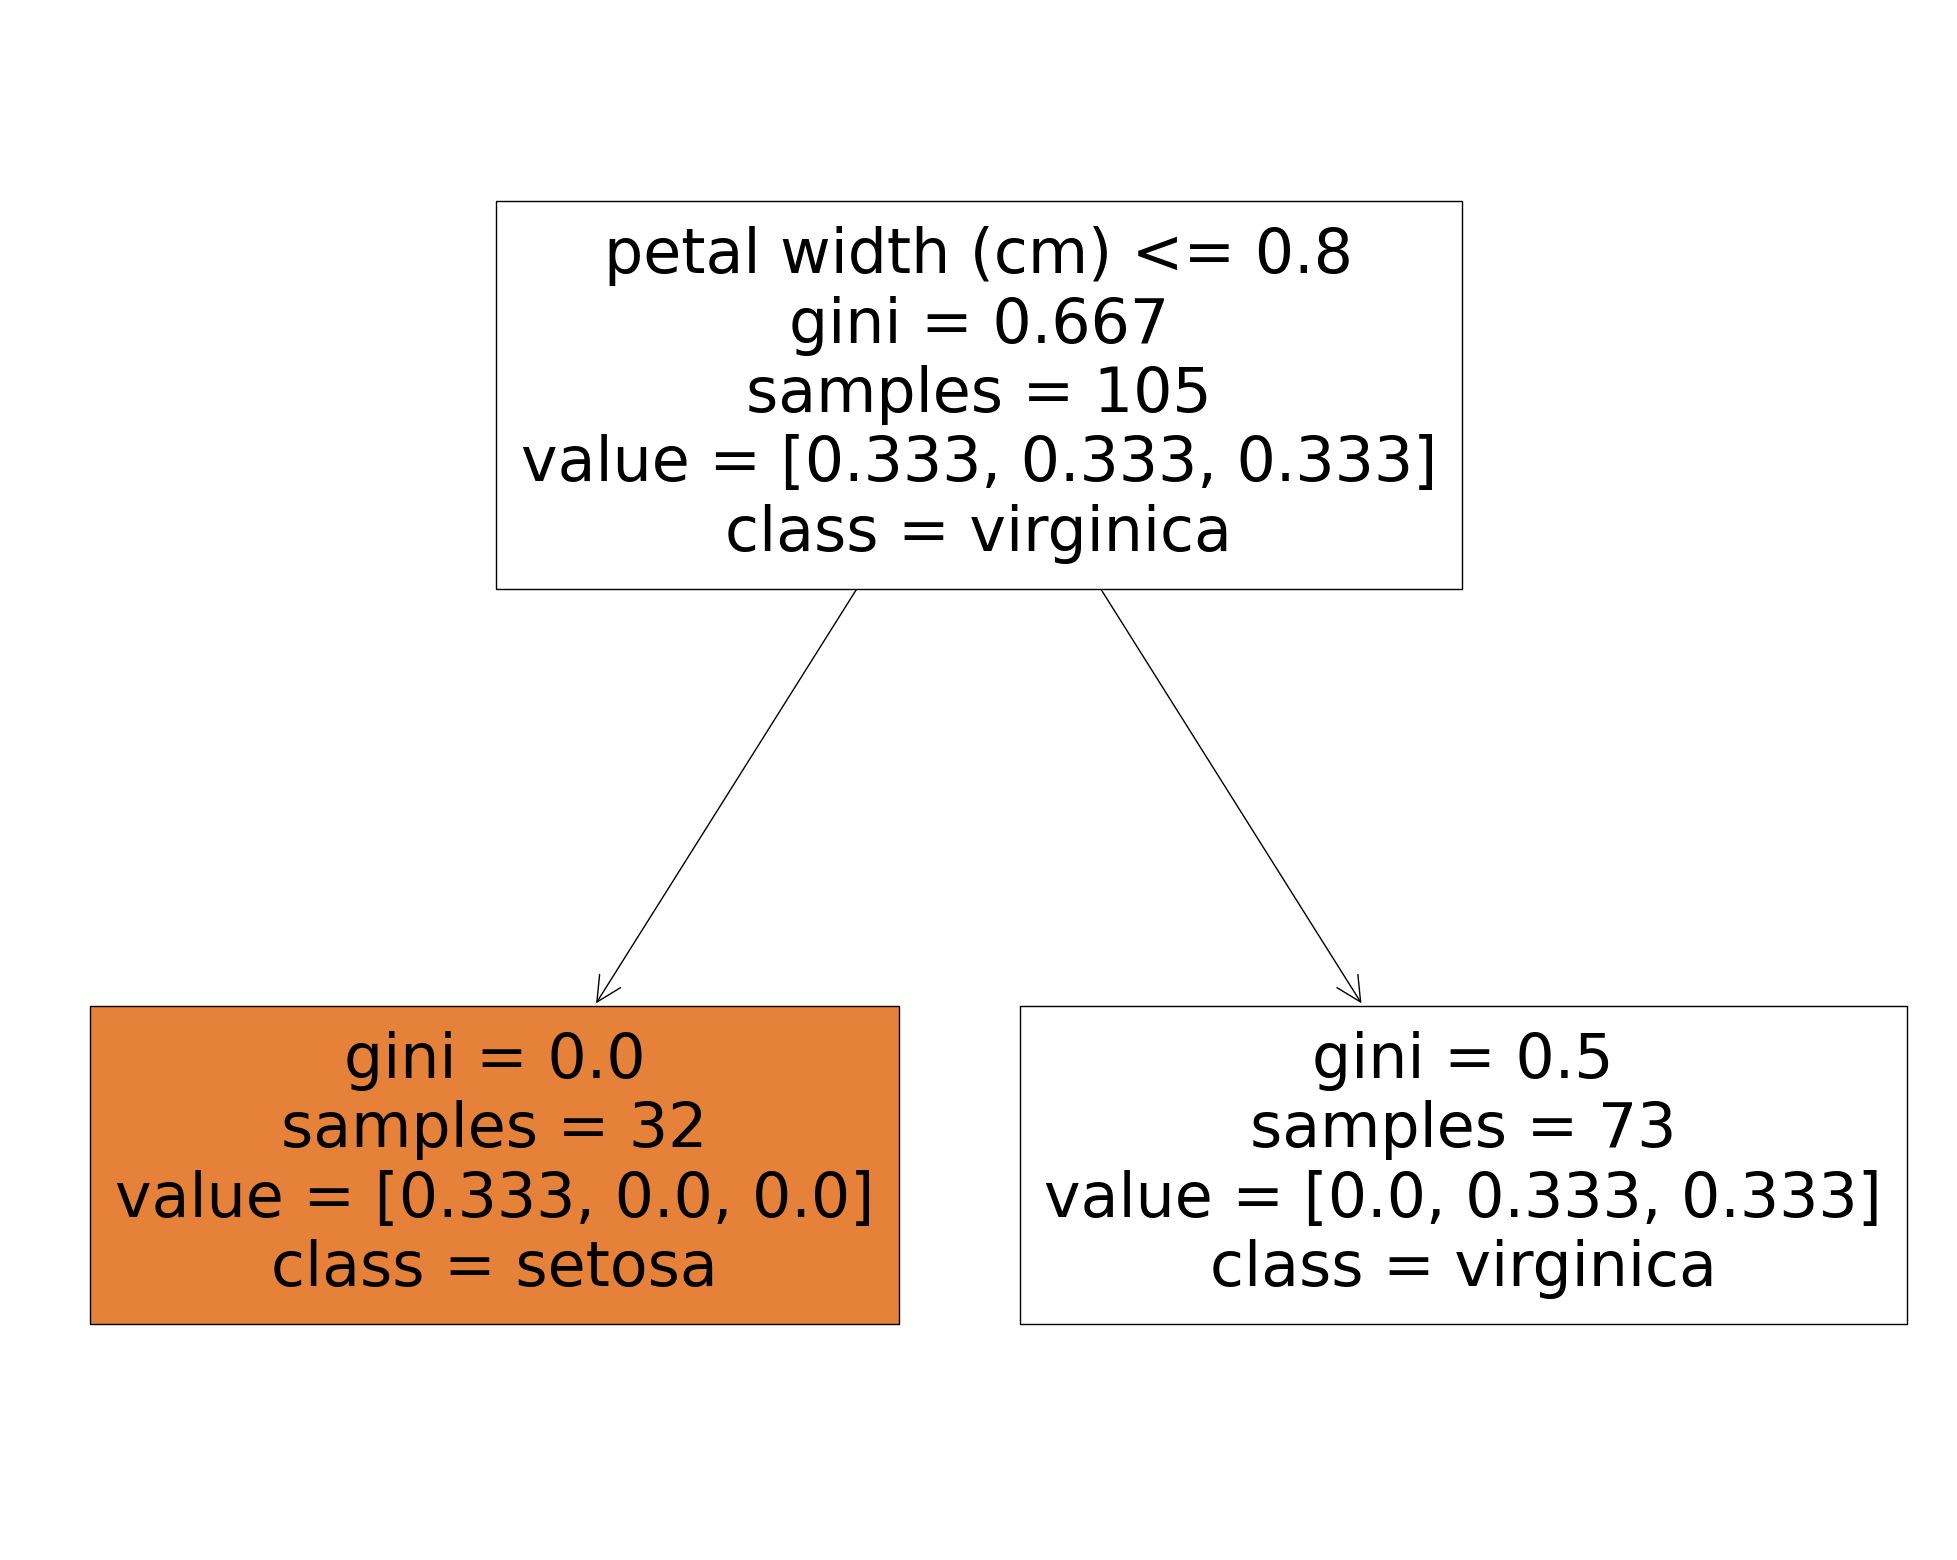

AdaBoostClassifier DecisionTreeClassifier 4


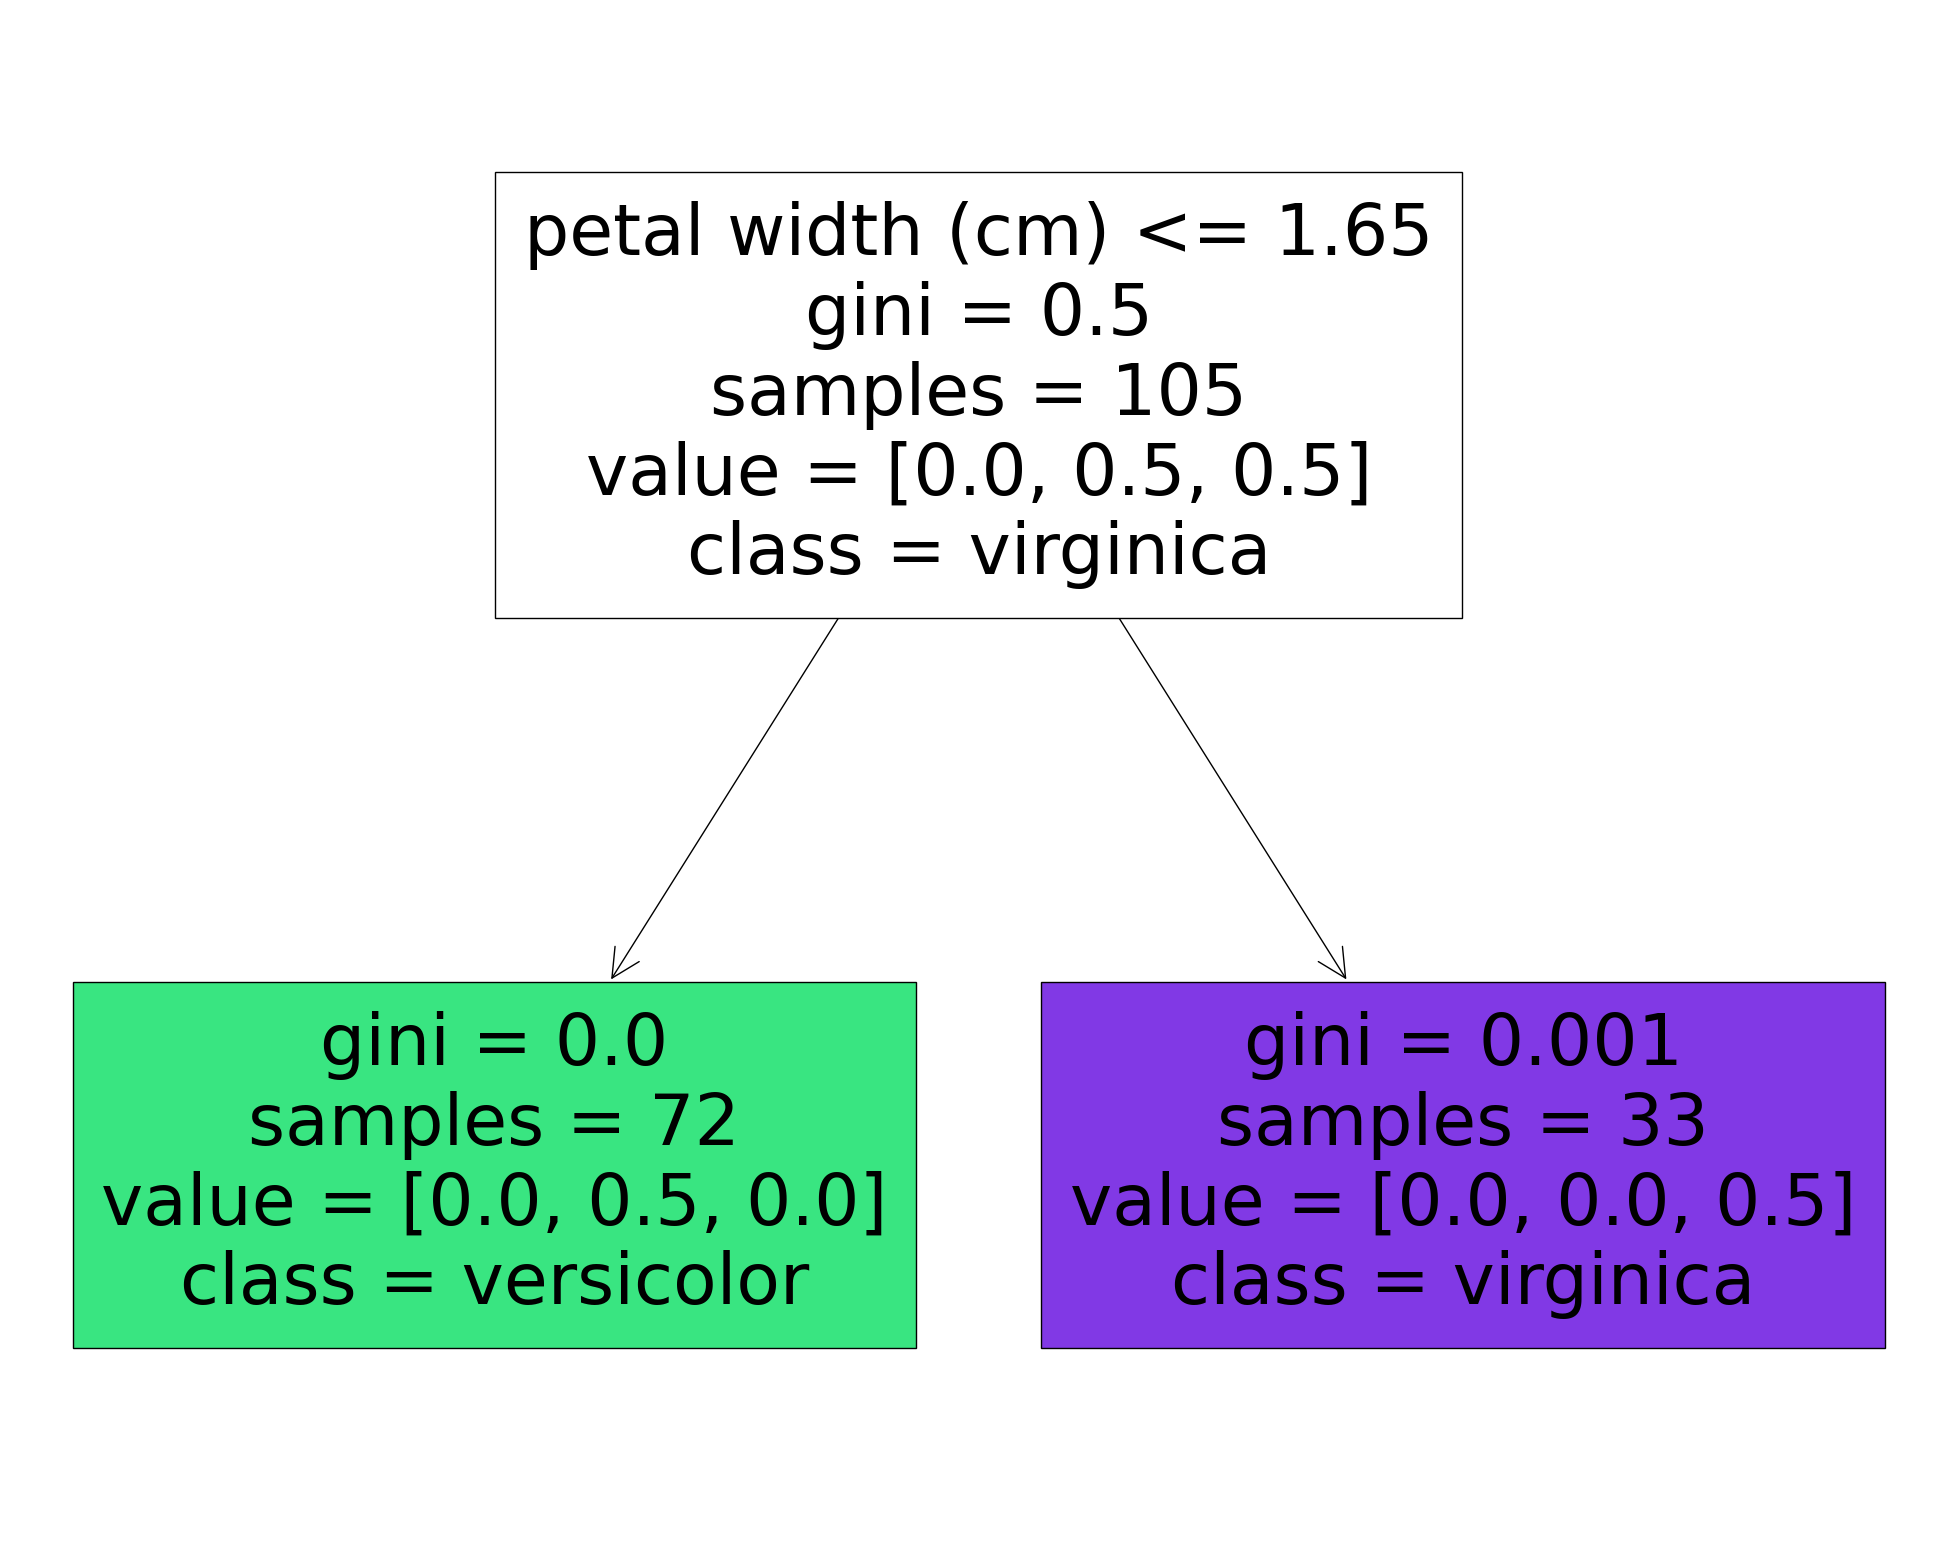

RandomForestClassifier accuracy: 0.9333333333333333
RandomForestClassifier feature importances:
 petal width (cm)     0.450619
petal length (cm)    0.446313
sepal length (cm)    0.085150
sepal width (cm)     0.017918
dtype: float64

RandomForestClassifier DecisionTreeClassifier 0


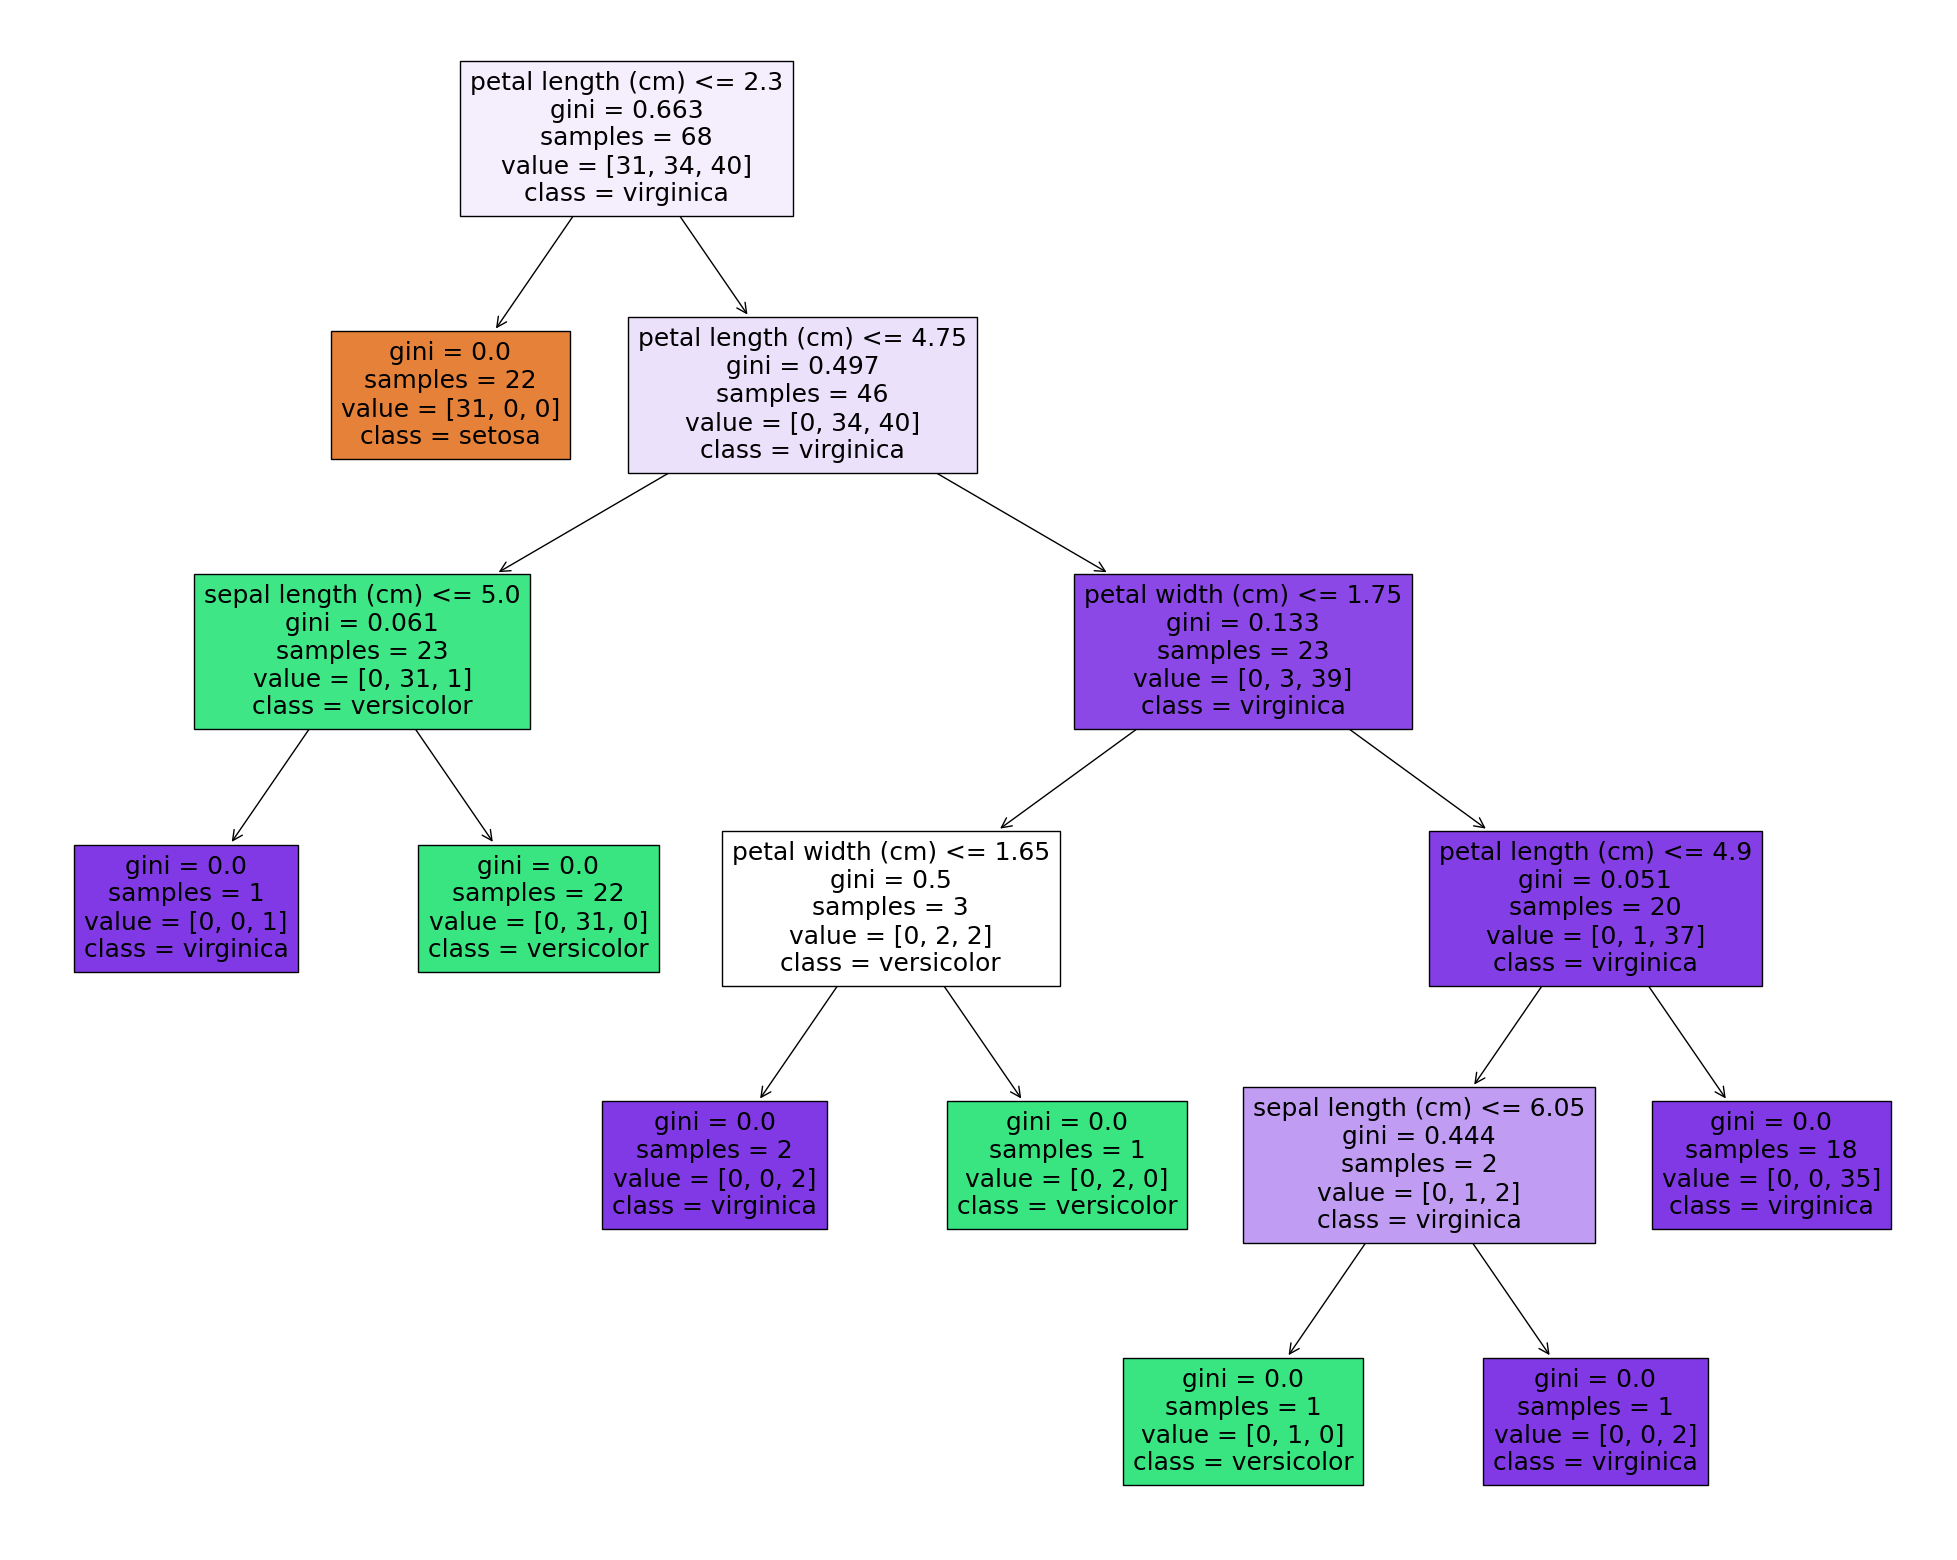

RandomForestClassifier DecisionTreeClassifier 1


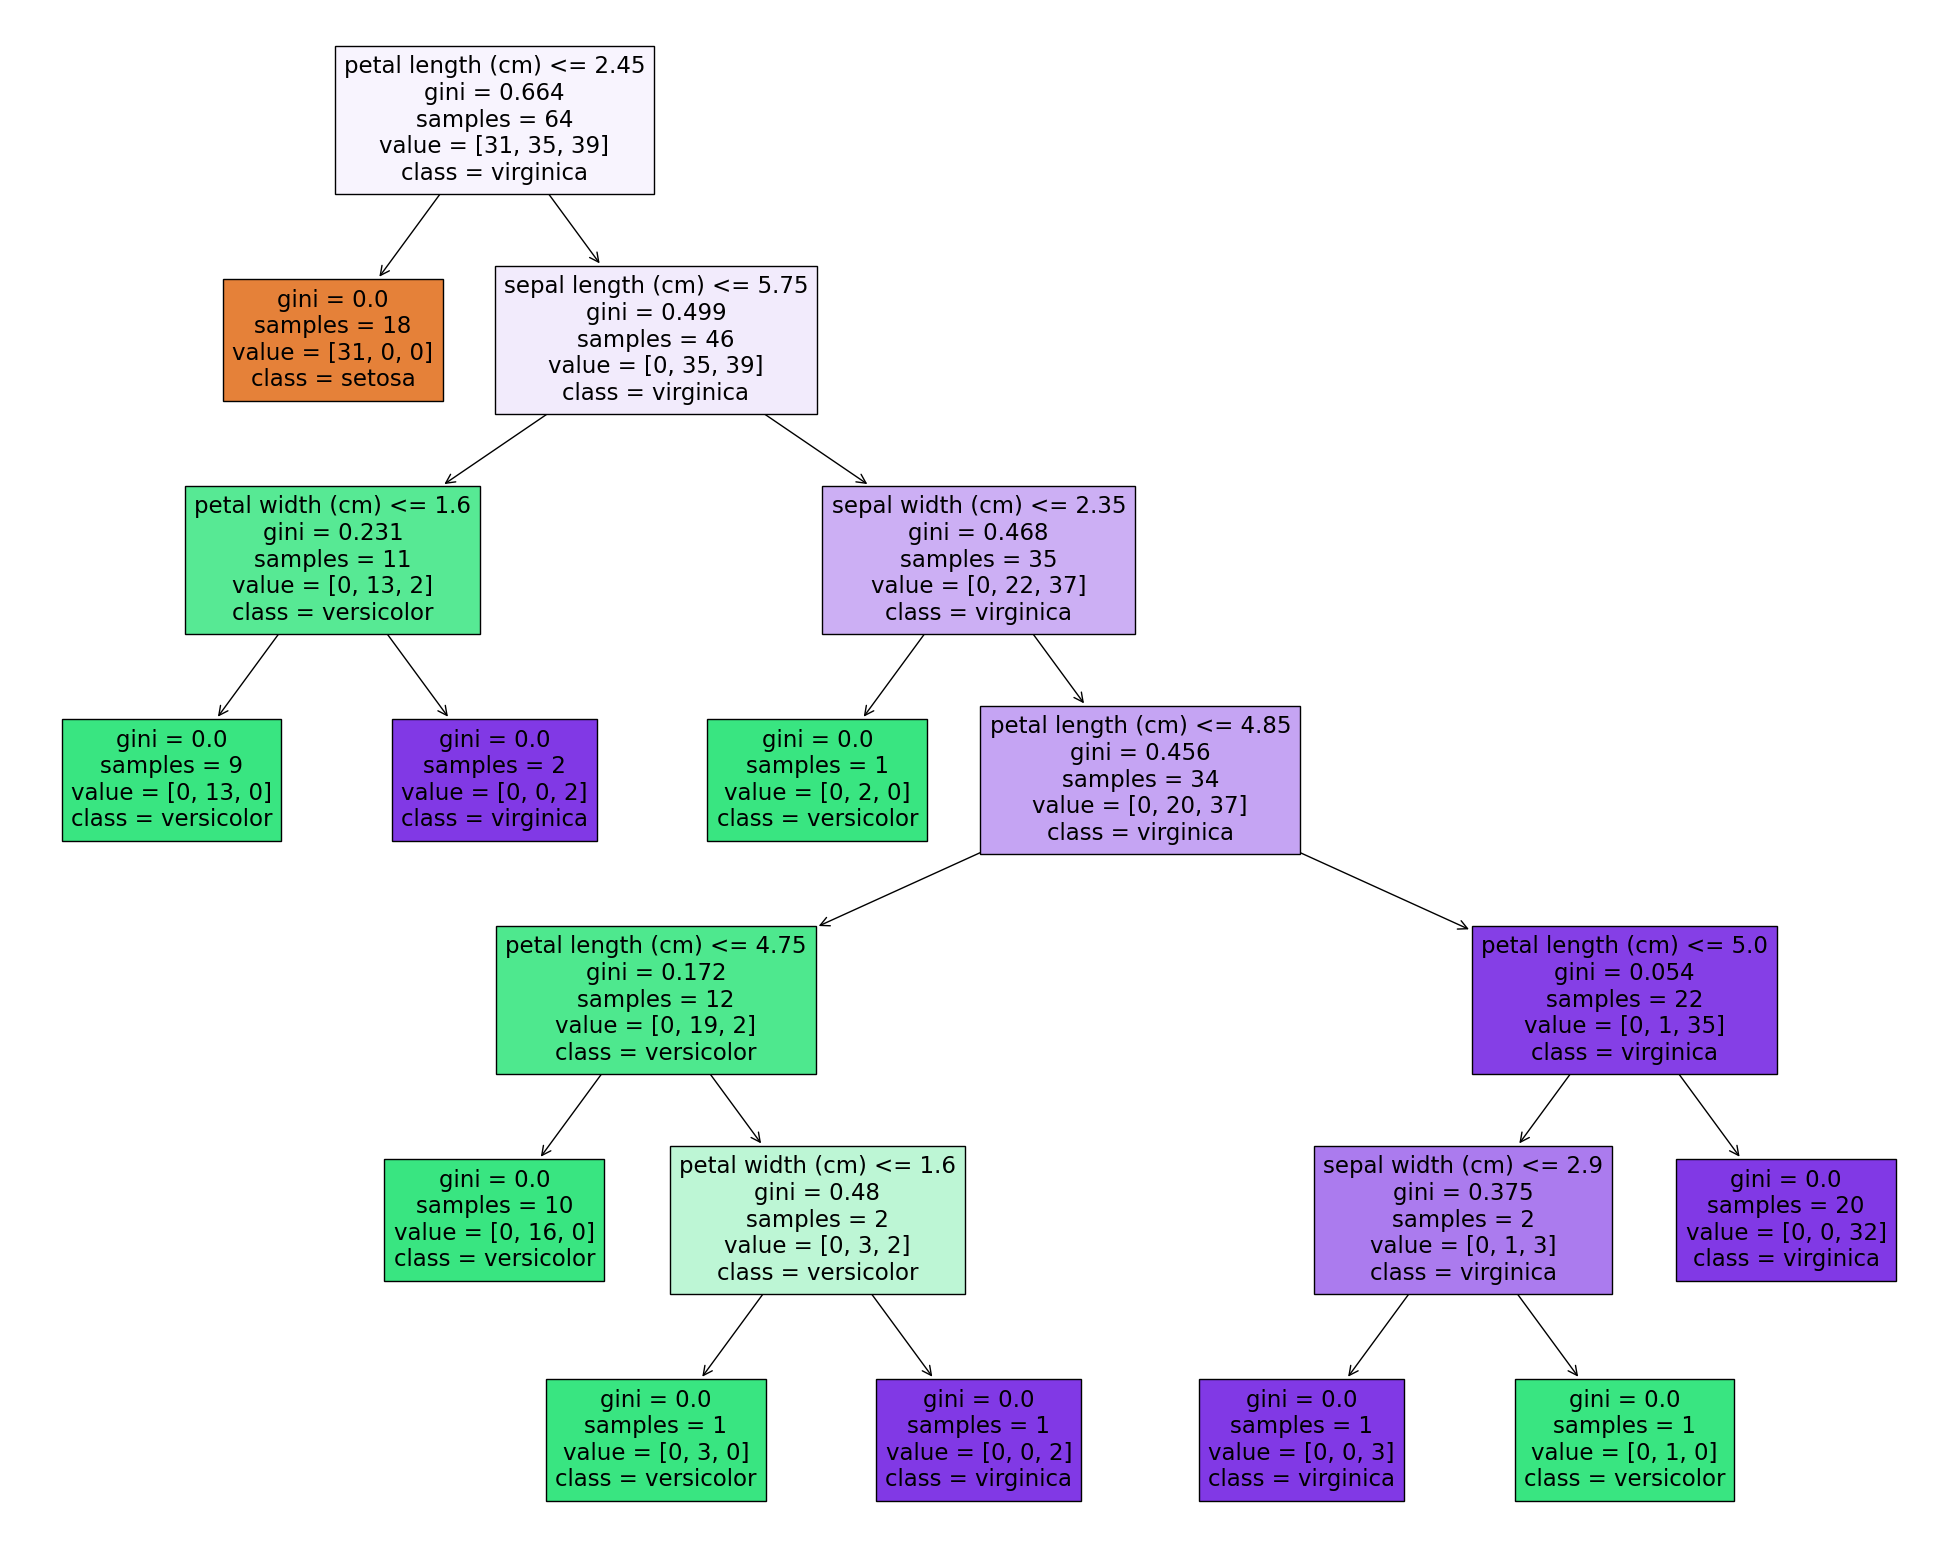

RandomForestClassifier DecisionTreeClassifier 2


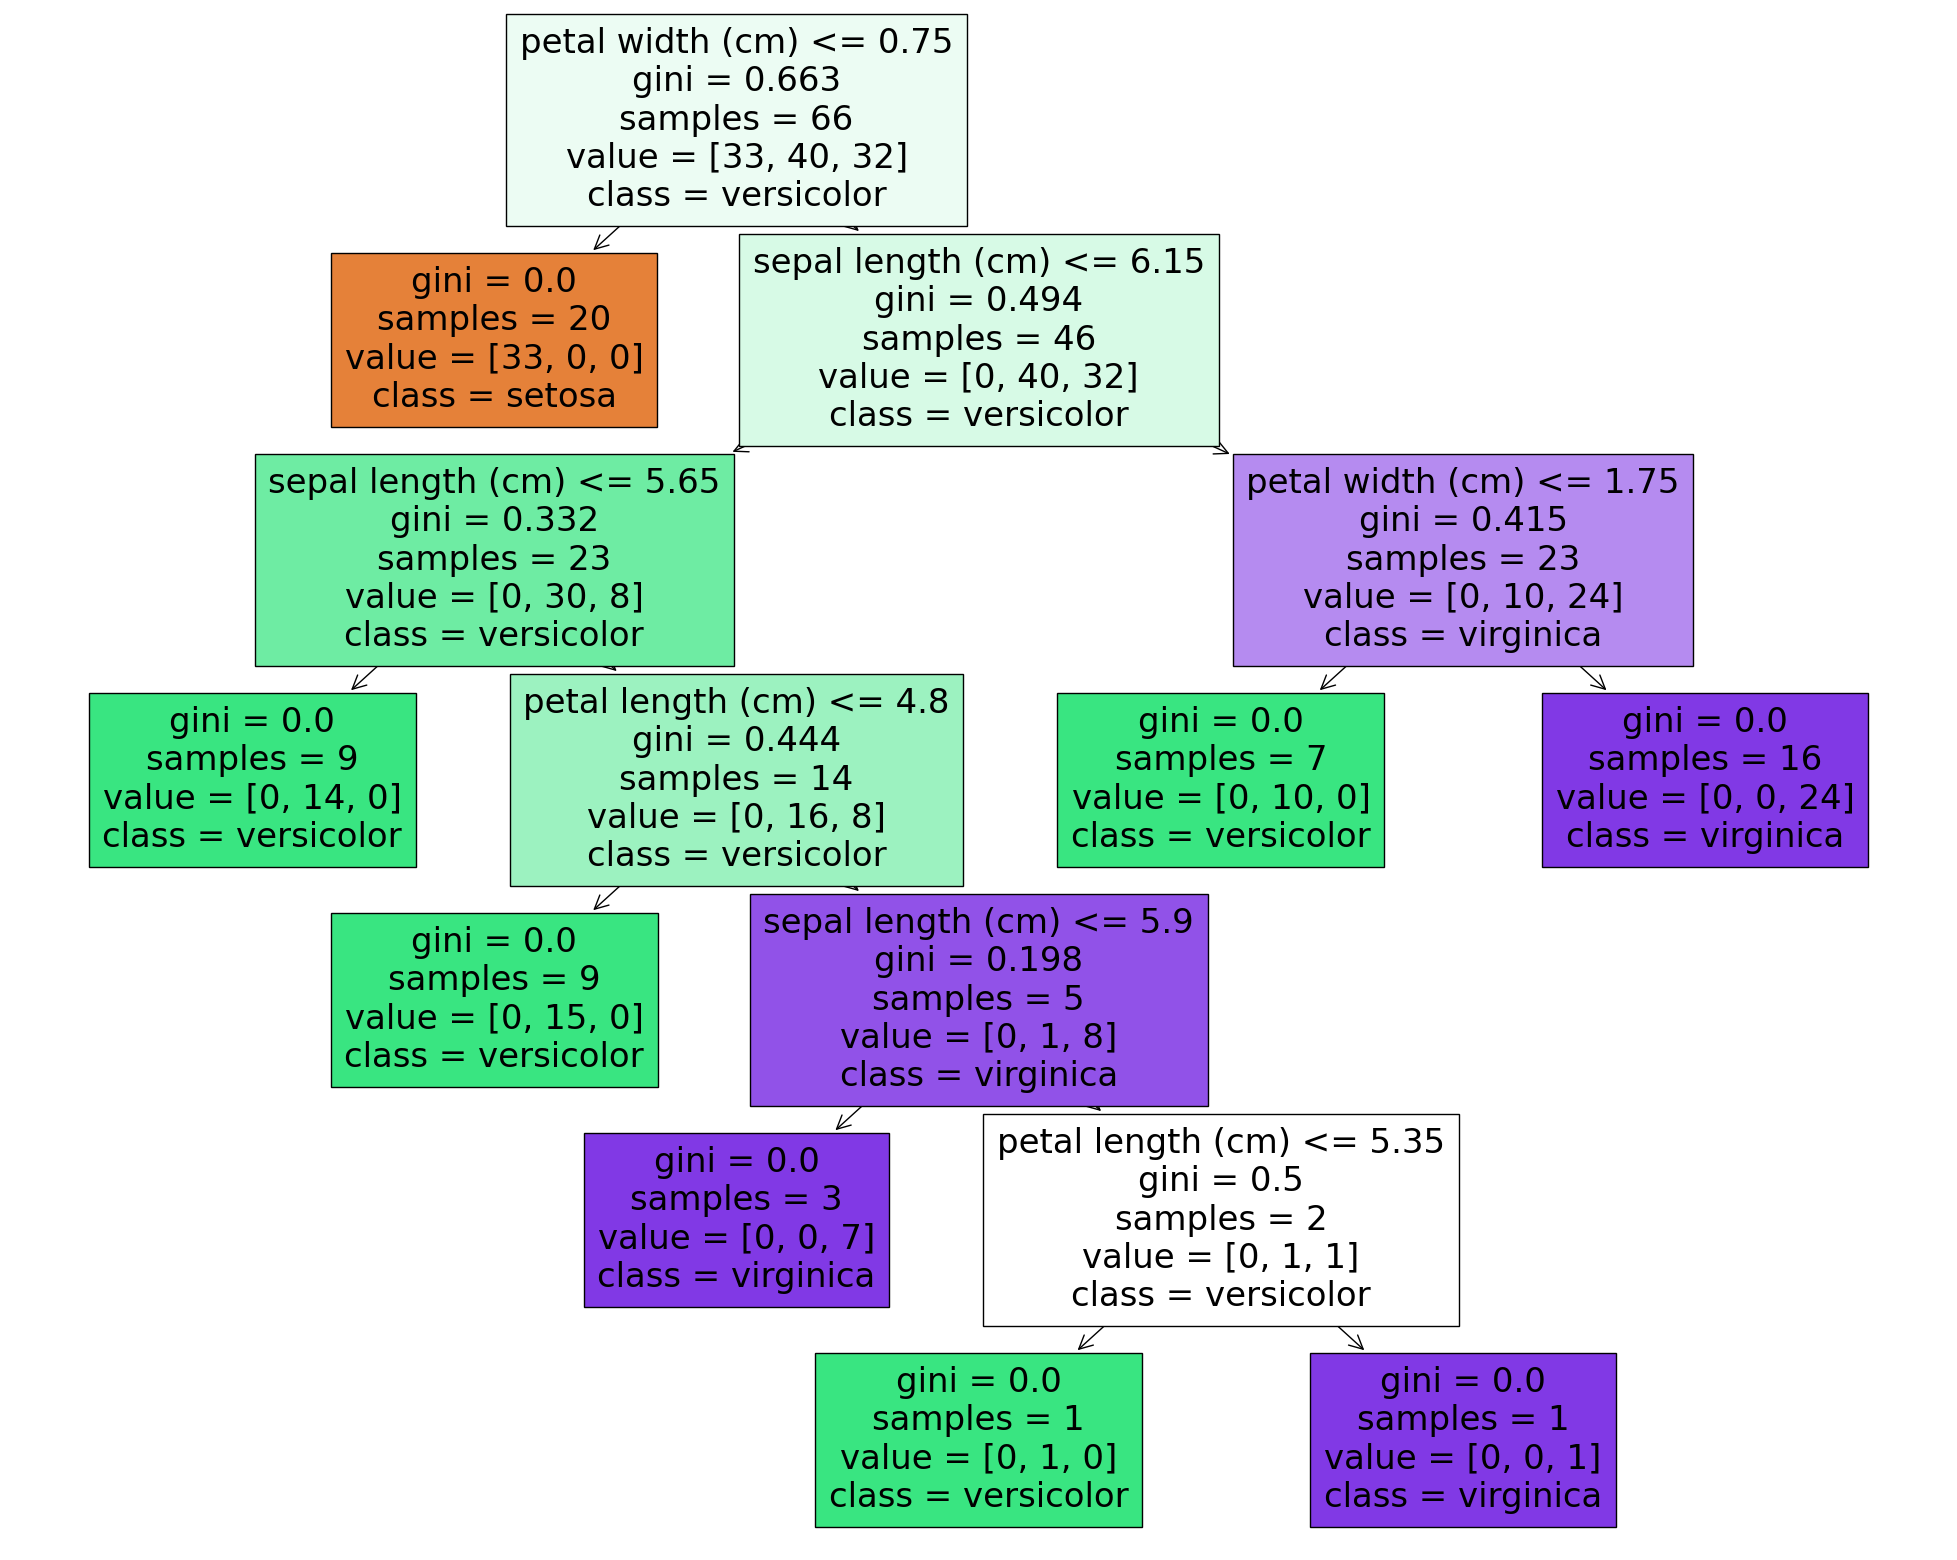

RandomForestClassifier DecisionTreeClassifier 3


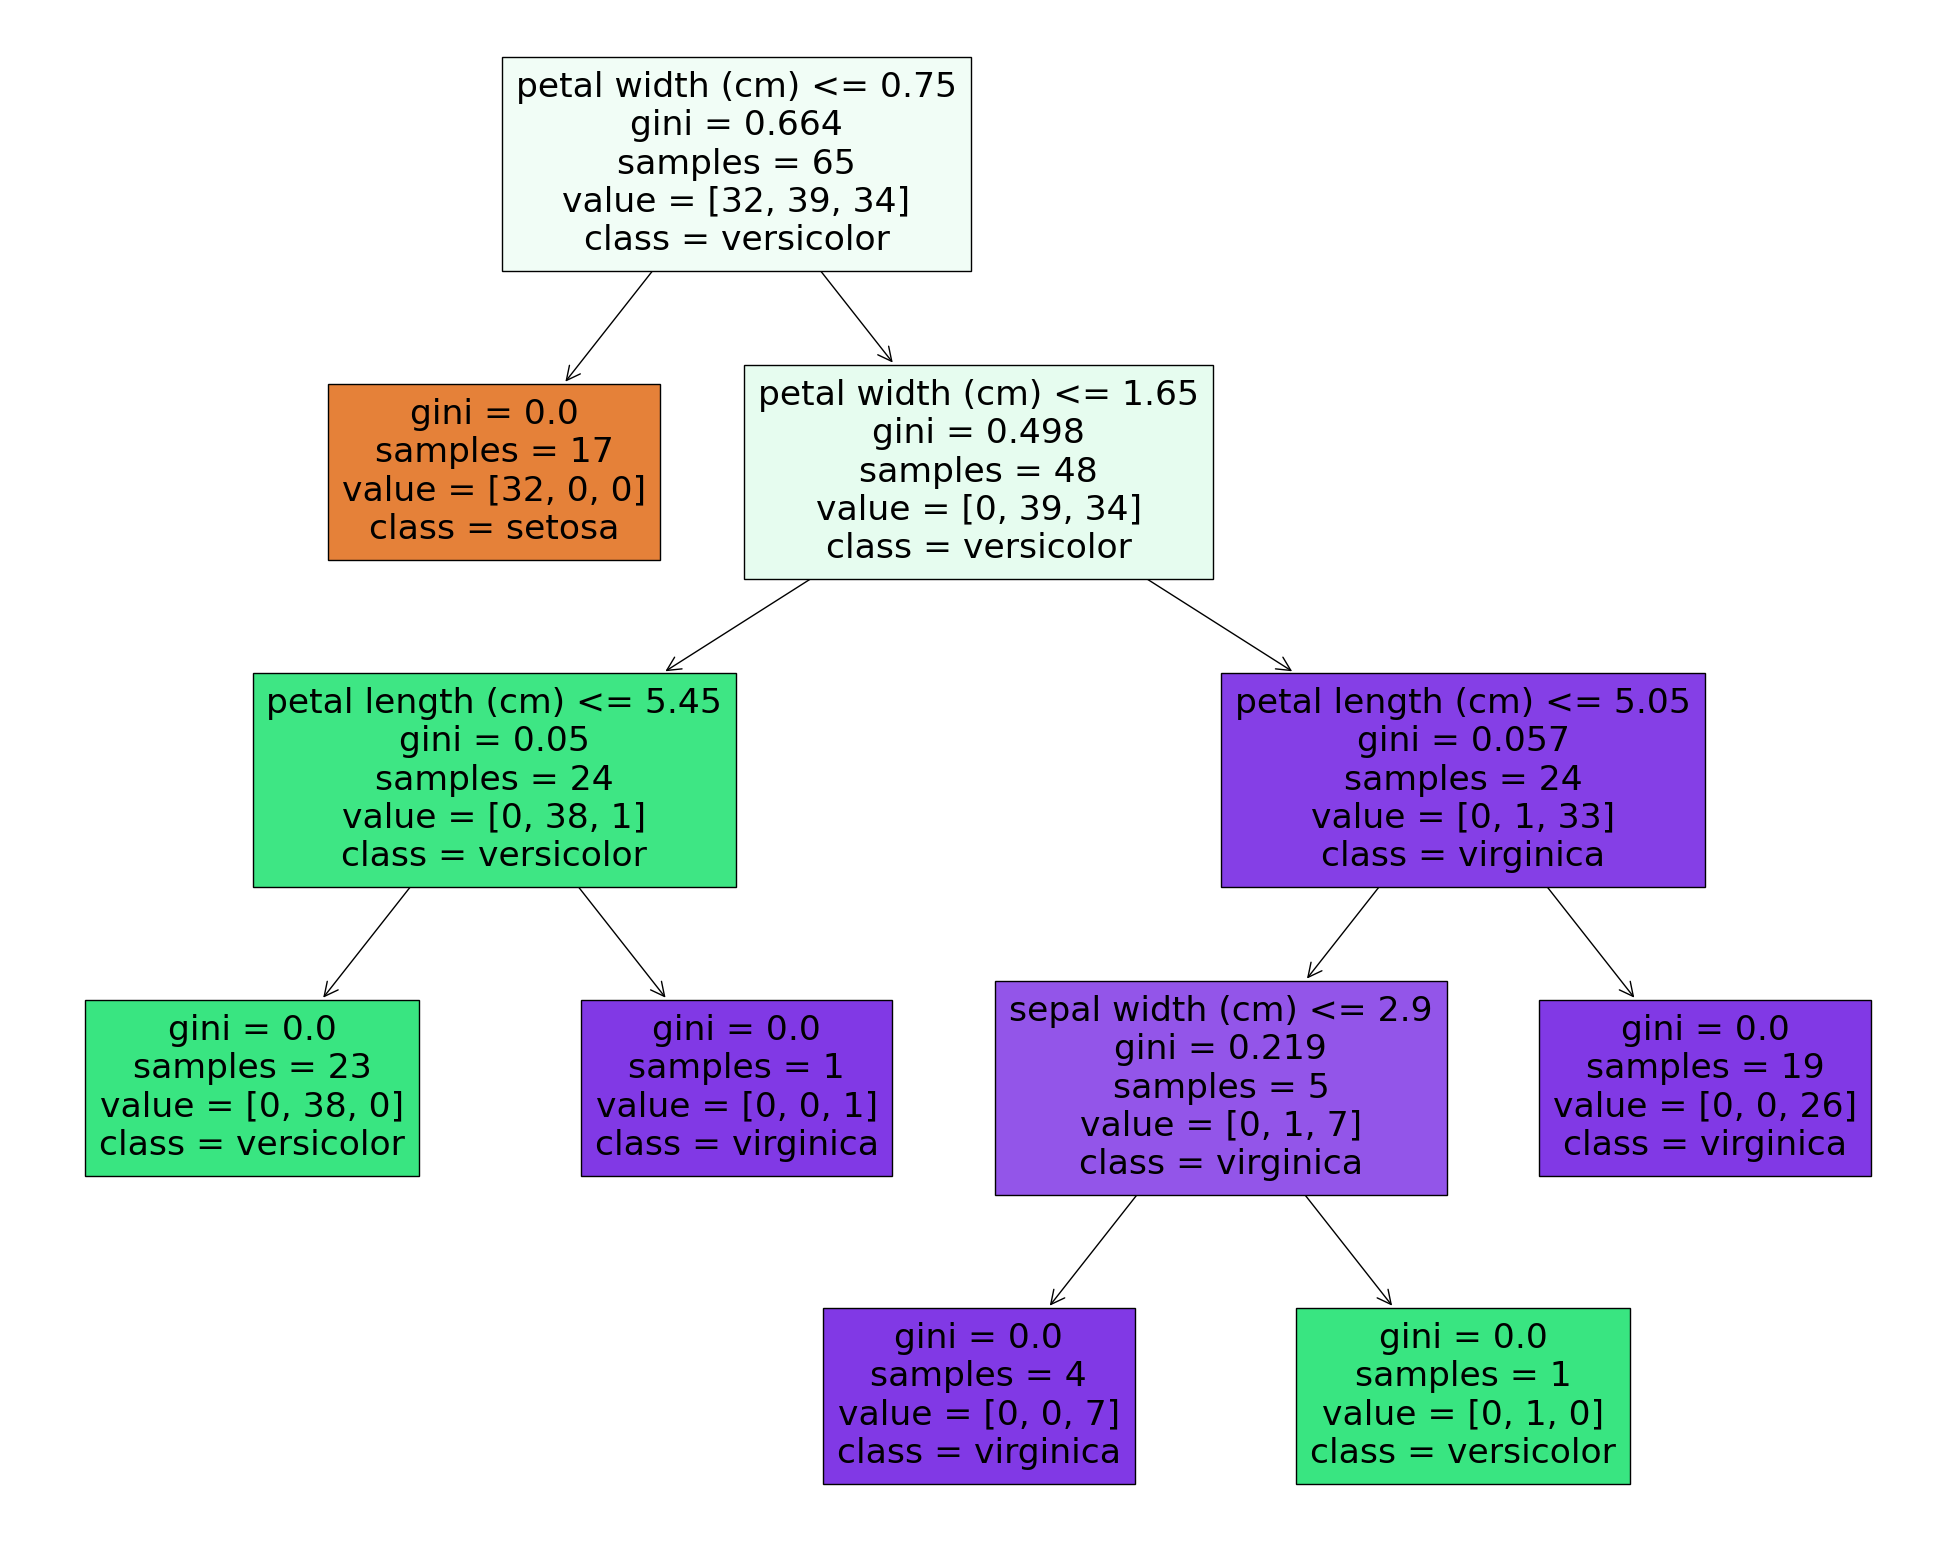

RandomForestClassifier DecisionTreeClassifier 4


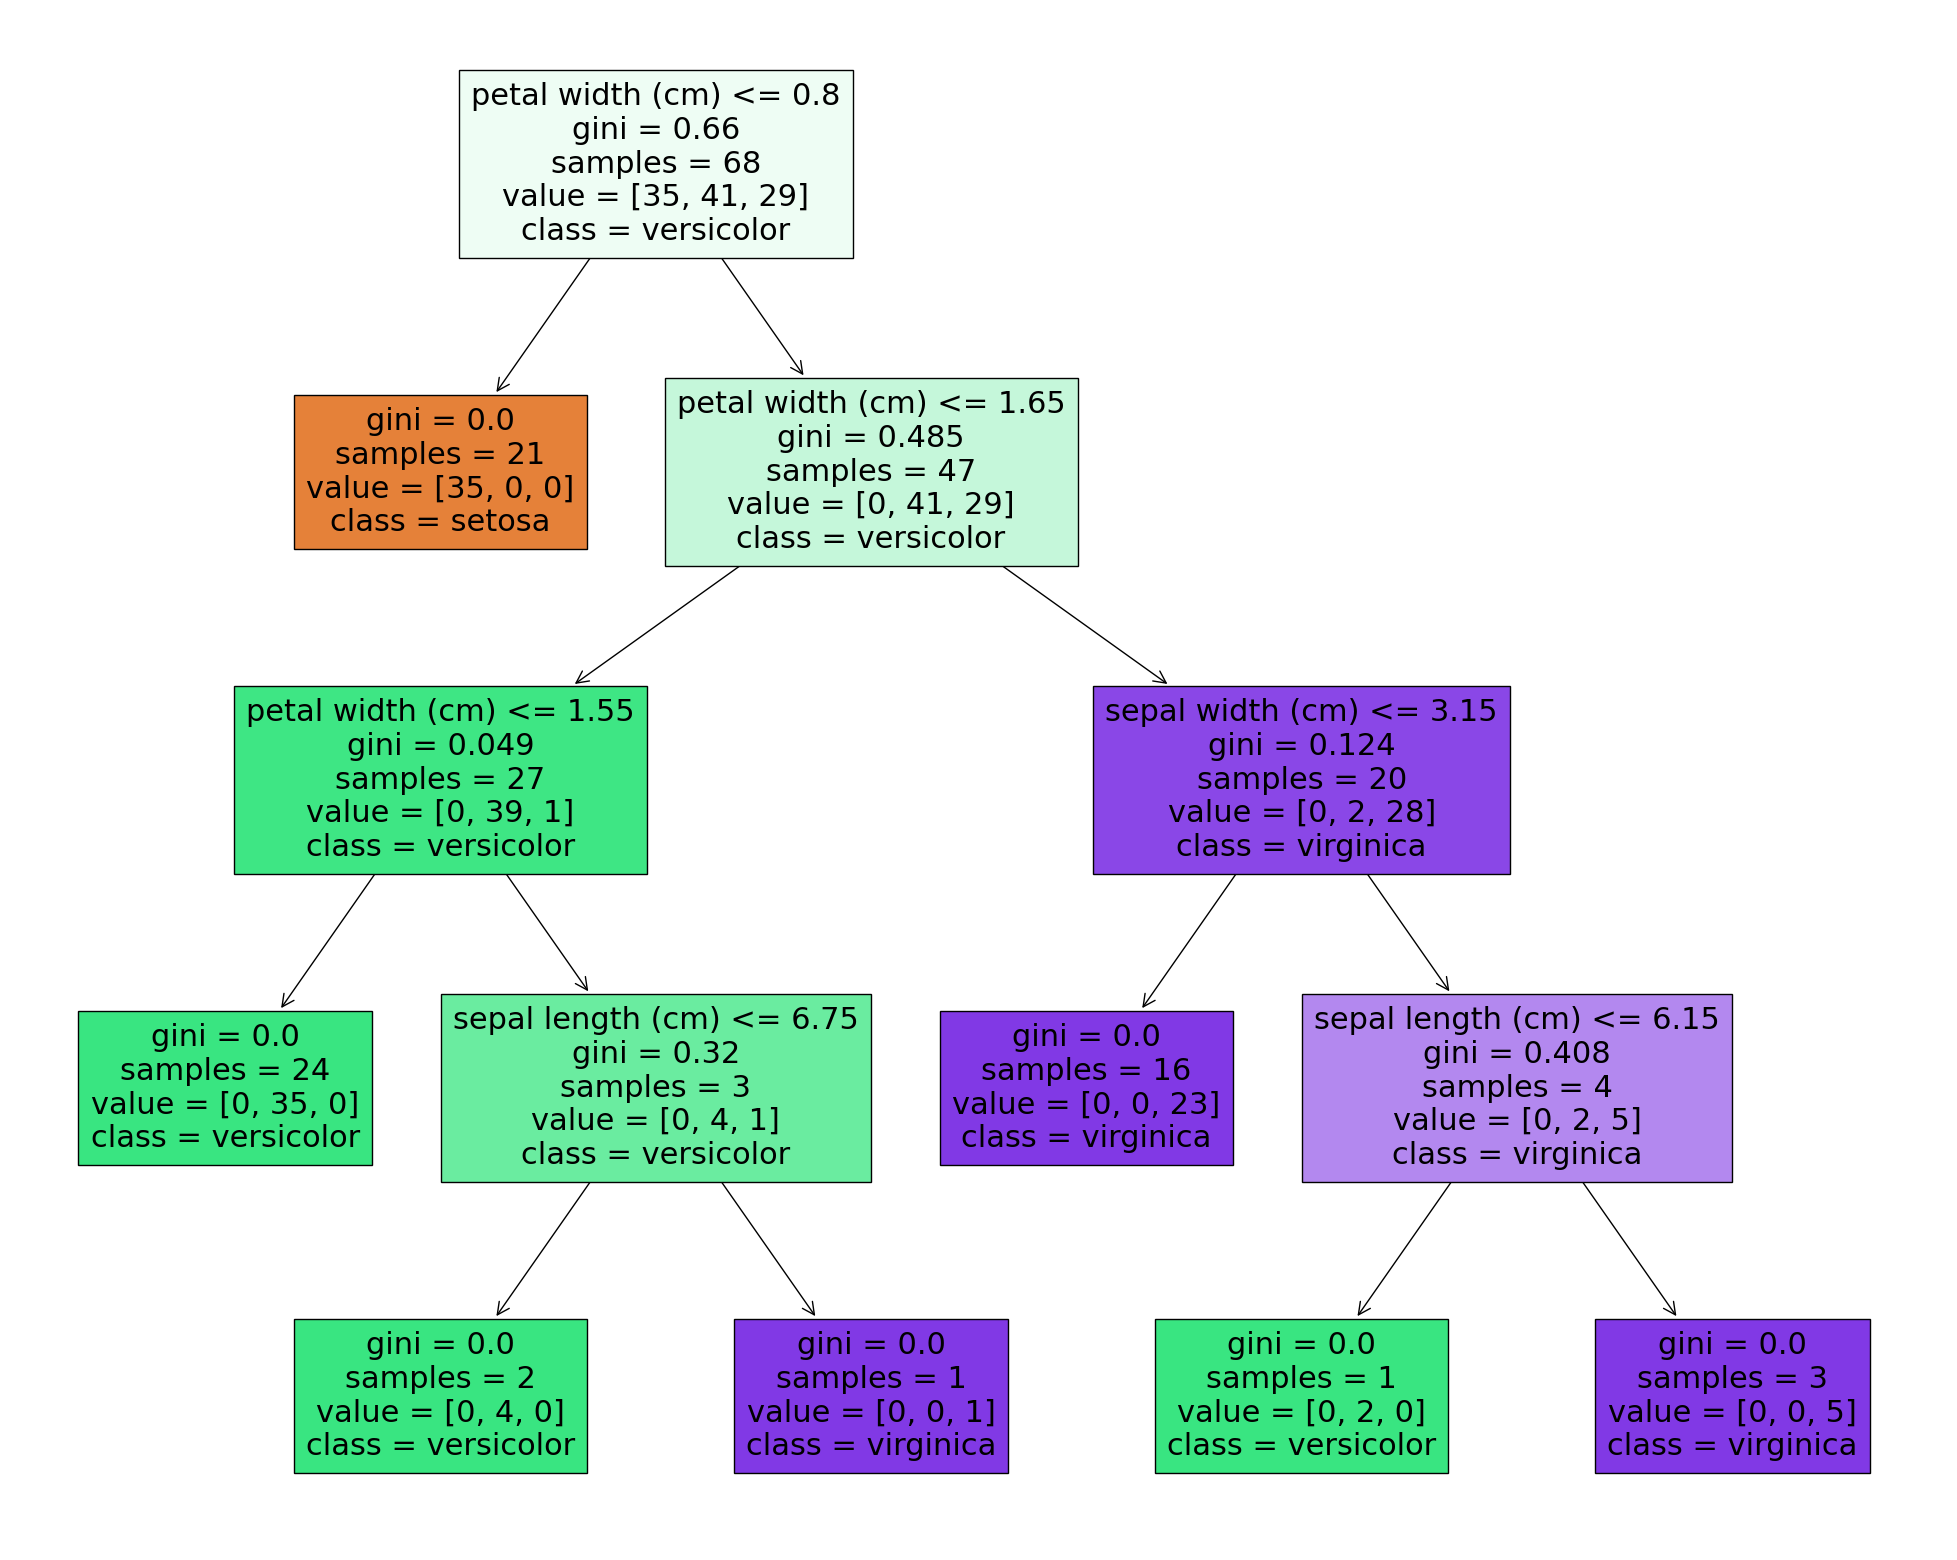

In [39]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree


for classifier in (AdaBoostClassifier(n_estimators=100), RandomForestClassifier(n_estimators=100)):
    classifier.fit(X_train, y_train)
    print(f"{classifier.__class__.__name__} accuracy:", classifier.score(X_test, y_test))
    print(f"{classifier.__class__.__name__} feature importances:\n", pd.Series(classifier.feature_importances_, index=X.columns).sort_values(ascending=False))
    print()
    for estimator_i, estimator in enumerate(classifier.estimators_[:5]):
        fig = plt.figure(figsize=(25,20))
        print(f"{classifier.__class__.__name__} {estimator.__class__.__name__} {estimator_i}")
        _ = tree.plot_tree(estimator,
                           feature_names=list(X.columns),
                           class_names=list(iris.target_names),
                           filled=True)
        plt.show()